# Predictive Analytics State of Dispair Final Project Fall 2024

## Generic Imports/Data Import

In [1]:
from support import *

### TODO : THIS IS UGLY, fix this when there is more time

In [2]:
train = pd.read_csv("C:/Users/Trevo/OneDrive/Documents/GitHub/pred_analytics_final/data/state-of-despair-ii/train2.csv")
train.head()

,id,V1,V2,Y1,Y2,Y3,Y4,Y5,Y6,Y7,...,Y17,Y18,Y19,Y20,Y21,Y22,Y23,Y24,Y25,Y26
0,1,2,3,14136,15218,15968,16654,17164,17574,18205,...,32133,32556,33753,35198,35820,36864,38317,39875,40297,42520
1,2,3,5,5027,5389,5778,6121,6355,6429,6644,...,10271,10847,11748,12632,12363,12575,13201,13809,14432,15186
2,3,3,7,466,474,510,544,593,630,659,...,1468,1551,1671,1814,1897,2005,2109,2244,2402,2500
3,4,4,7,1365,1505,1608,1671,1780,1942,2131,...,4335,4718,5000,5187,5427,5680,5784,6215,6492,7003
4,5,5,5,2402,2584,2708,2822,3016,3248,3383,...,5918,6297,6659,6892,7085,7476,7575,7954,8490,9177


## EDA

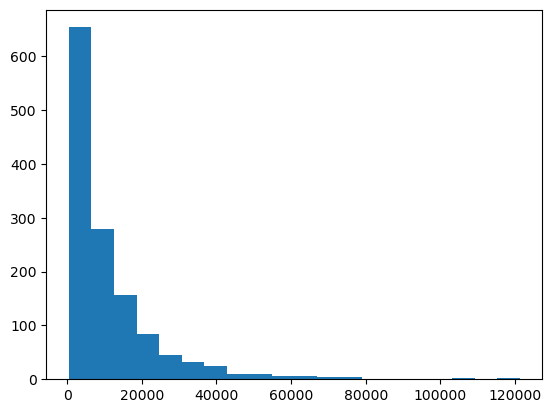

In [3]:
observations = train.drop(columns=['id', 'V1', 'V2']).values  # Remove the ID column
observations_reshaped = observations.reshape(observations.shape[0] * observations.shape[1], 1)

plt.hist(observations_reshaped, bins = 20)
plt.show()

For the initial model, there was certainly some skewedness that had impacted the results with the many of the lower observations being severely undershot and the higher observaitons being clearly overshot. 

### Analysis on the data:
The data contains both static and dynamic componenets, with the time series aspect being dynamic, changing for every observtion whereas the quantitative variables are both static, staying stagnant throughout all observations. 

## Recurrent Neural Network (RNN) Model

In [ ]:
### TODO : ITERATE THROUGH OBSERVATIONS ### 
observations = observations[81]

# Show Training Models for the hyperparameter tuning

rnn_model = build_rnn_model(TIME_STEPS, PREDICT_STEPS, FEATURES)
rnn_model.compile(optimizer=tf.keras.optimizers.Adam(ALPHA), loss="mse", metrics=["mse"])

# Globally scale to avoid any descaling conflicts
scaler = StandardScaler()
observations = scaler.fit_transform(observations.reshape(-1,1))

X, y = window(observations)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
history = rnn_model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCHES, validation_data=(X_test, y_test), verbose=0)

### TODO : PRINT IF X == ... to show hyperparameter tuning ###
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss: LSTM')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()


# Show Test models for the final upload
rnn_model_test = build_rnn_model(TIME_STEPS, PREDICT_STEPS, FEATURES)
rnn_model_test.compile(optimizer=tf.keras.optimizers.Adam(ALPHA), loss="mse", metrics=["mse"])

# Train the model:
history = rnn_model_test.fit(X, y, epochs=EPOCHS, batch_size=BATCHES, verbose=0)

# Graphage
### TODO : Create if-statement in the loop for this ### 
# plt.plot(history.history['loss'], label='Training Loss')
# plt.title('Training Loss: LSTM TEST MODEL')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

test_window(X, y, rnn_model_test, scaler, 6)

# TODO : Predict 5 past the last
test_input = observations[-TIME_STEPS:]
predictions = test(rnn_model_test, scaler, test_input)

[[ 5436.]
 [ 5601.]
 [ 5908.]
 [ 6239.]
 [ 6720.]
 [ 7300.]
 [ 7814.]
 [ 8303.]
 [ 8821.]
 [ 9446.]
 [10128.]
 [10913.]
 [11590.]
 [12112.]
 [12374.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
[[ 209.66894531]
 [  -1.83203125]
 [-109.74511719]
 [-232.24316406]
 [-321.50390625]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [5]:
print(scaler.inverse_transform(observations))

[[ 3750.]
 [ 4087.]
 [ 4385.]
 [ 4713.]
 [ 4853.]
 [ 4932.]
 [ 5436.]
 [ 5601.]
 [ 5908.]
 [ 6239.]
 [ 6720.]
 [ 7300.]
 [ 7814.]
 [ 8303.]
 [ 8821.]
 [ 9446.]
 [10128.]
 [10913.]
 [11590.]
 [12112.]
 [12374.]
 [12608.]
 [12930.]
 [13476.]
 [14022.]
 [14836.]]


In [6]:
print(predictions)

[[13325.757]
 [12825.078]
 [13272.893]
 [14236.575]
 [14787.341]]


In [7]:
# X = []
# y = []
# 
# # iterate across rows
# # for i in range(len(observations)):
# #     # iterate across columns
# #     for j in range(observations.shape[1] - TIME_STEPS - PREDICT_STEPS + 1):
# #         # append
# #         X.append(observations[i, j:j + TIME_STEPS].reshape(-1, 1))
# #         y.append(observations[i, j + TIME_STEPS:j + TIME_STEPS + PREDICT_STEPS].reshape(-1, 1))  # Ensure shape (5, 1)
# 
# for i in range(observations.shape[0] - TIME_STEPS - PREDICT_STEPS + 1):
#     X.append(observations[i:i + TIME_STEPS])
#     y.append(observations[i + TIME_STEPS:i + TIME_STEPS + PREDICT_STEPS])  # Ensure shape (5, 1)
# 
# X = np.array(X)
# y = np.array(y)
# 
# # Step 3: Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 
# print(f"Train set shape: {X_train.shape}, {y_train.shape}")
# print(f"Test set shape: {X_test.shape}, {y_test.shape}")

#### Quick Aside:
Running a bit short on time from other projects, if I get the chance to come back in and read in the qualtiative variables, that would be great. If not... 

In [8]:
# Train the model:
# history = rnn_model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCHES, validation_data=(X_test, y_test), verbose=1)

### Create some graphage

In [9]:
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss: LSTM')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

#### NOTE:
For the 'knee bend' principal, it seems like stopping training at roughly 20-25 epochs seems like a smart strategy with the loss graph. 

### Retrain the LSTM on the complete dataset keeping parameters the same

#### Observer performance on randomly selected data points:
Let's try train points 1, 8, and 86

## Neural Network (NN) Model

## Autoregressive Integrated Moving Average (ARIMA) Model

## Error-Trend-Seasonality (ETS)